<h1><center>Spring 2019CSCE-629 Project</center></h1>
<div style="text-align: center"> Rui Kou, 923006438 </div>





#### In this project, we implement 3 Maximum Bandwidth Algorithms: 
-  Dijkstra without max heap
-  Dijkstra with max heap
-  Kruskal with HeapSort

#### To start wtih, we load the packages that help with plotting and timing of the code 

In [13]:
import collections
import random
import numpy as np
import matplotlib.pyplot as plt
import time

#### Define Graph using Linkedlist data structure and generating sparse and dense graph
-  To generate sparse graph, we randomly pick 2 vertices to form an edge until there are totally 15,000 edges
-  To generate dense graph, we loop through each vertex, and generate a edge with all other vertices at 20% probability

In [2]:
class Graph:
    def __init__(self,x):
        self.Vertices = x
        self.Weight = collections.defaultdict(int)
        self.LinkedList = collections.defaultdict(set)
        self.Edges = x-1
        for i in range(x-1):
            self.LinkedList[i].add(i+1)
            self.LinkedList[i+1].add(i)
            _w = random.randrange(1,100) 
            self.Weight[tuple([i,i+1])] = _w
            self.Weight[tuple([i+1,i])] = _w

    def sparse_graph(self):
        total_edges = self.Vertices*3
        #print(total_edges)
        while self.Edges < total_edges:
            v = random.randrange(self.Vertices)
            w = random.randrange(self.Vertices)
            if v != w and w not in self.LinkedList[v]:
                #print(v,w)
                self.LinkedList[v].add(w)
                self.LinkedList[w].add(v)
                self.Edges +=1
                #print(self.Edges)
                _w = random.randrange(1,100) 
                self.Weight[tuple([v,w])] = _w
                self.Weight[tuple([w,v])] = _w
                    
    def dense_graph(self):
        for v in range(self.Vertices):
            for w in range(v+1,self.Vertices):
                if w not in self.LinkedList[v] and random.uniform(0,1)<=0.2:
                    self.LinkedList[v].add(w)
                    self.LinkedList[w].add(v)
                    self.Edges +=1    
                    _w = random.randrange(1,100) 
                    self.Weight[tuple([v,w])] = _w
                    self.Weight[tuple([w,v])] = _w

#### Next, we create 5 pairs of sparse and dense graphs
- Generating 5 sparse graph with average vertex degree of 6
- Generate 5 dense graphs, in which each vertex is adjacent to 20% of other vertices


In [8]:
g1_s = Graph(5000)
g1_s.sparse_graph()

g2_s = Graph(5000)
g2_s.sparse_graph()

g3_s = Graph(5000)
g3_s.sparse_graph()

g4_s = Graph(5000)
g4_s.sparse_graph()

g5_s = Graph(5000)
g5_s.sparse_graph()

In [65]:
sparse_graphs = [g1_s,g2_s,g3_s,g4_s,g5_s]

In [9]:
g1_d = Graph(5000)
g1_d.dense_graph()

g2_d = Graph(5000)
g2_d.dense_graph()

g3_d = Graph(5000)
g3_d.dense_graph()

g4_d = Graph(5000)
g4_d.dense_graph()

g5_d = Graph(5000)
g5_d.dense_graph()

In [66]:
dense_graphs = [g1_d,g2_d,g3_d,g4_d,g5_d]

#### To confirm our graph is generated as planned, we plot the histogram shown as below:
-  1. Plot number of edge distribution for sparse graph. It shows the distribution peaks at 6, which proved our implementation of sparse graph
-  2. Plot number of edge distribution for dense graph. It shows the distribution peaks at 1000, which proved our implementation of dense graph¶

(array([  0.,   0., 100., 362., 763., 934., 985., 778., 527., 280., 150.,
        108.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 12 Patch objects>)

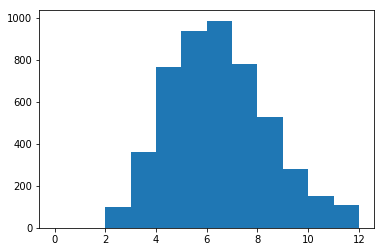

In [10]:
a = []
for key in g1_s.LinkedList:
    a.append(len(g1_s.LinkedList[key]))
plt.hist(a, bins = np.linspace(0,12,13))

(array([  23.,  111.,  408.,  977., 1370., 1207.,  663.,  190.,   47.,
           4.]),
 array([ 906. ,  926.1,  946.2,  966.3,  986.4, 1006.5, 1026.6, 1046.7,
        1066.8, 1086.9, 1107. ]),
 <a list of 10 Patch objects>)

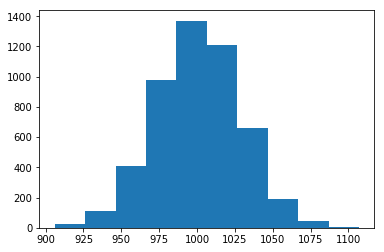

In [171]:
a = []
for key in g1_d.LinkedList:
    a.append(len(g1_d.LinkedList[key]))
#interval = np.linspace(0,2000,100)
plt.hist(a)

## Algorithm 1: 
#### Dijkstra Algorithm without using a heap structure, the time complexity is $O(n^{2}$)

In [103]:
 def Dijkstra_n2(g1,s,t):
    status =[0]*g1.Vertices
    bw = [0]*g1.Vertices
    dad = [-1]*g1.Vertices
    for i in range(g1.Vertices):
        status[i]='unseen'
    status[s] = 'intree'
    bw[s] = 9999
    for v in g1.LinkedList[s]:
        status[v] = 'fringe'
        bw[v] = g1.Weight[s,v]
        dad[v] = s
    while 'fringe' in status:
        max_bw = 0
        for i in range(len(status)):
            if status[i]=='fringe' and bw[i]>max_bw:
                max_bw = bw[i]
                idx = i
        v = idx
        status[v] = 'intree'
        if v == t:
            return bw[v]
        for w in g1.LinkedList[v]:
            if status[w]=='unseen':
                status[w] = 'fringe'
                dad[w]=v
                bw[w]=min(bw[v],g1.Weight[v,w])
                #if w == t:
                 #   return bw[w]
            elif status[w]=='fringe' and bw[w]<min(bw[v],g1.Weight[v,w]):
                dad[w]=v
                bw[w]=min(bw[v],g1.Weight[v,w])

#### To test the performance of algorithm 1, we use the 5 sparse graphs, and perform the task of finding MBP for 5 random s and t pairs
-  We show the run time for all 25 combinations (5 graphs x 5 random s,t paris)
-  The average run time of algorithm1 on sparse graph is 1.3 seconds

The average running time is 1.3059288120269776 seconds


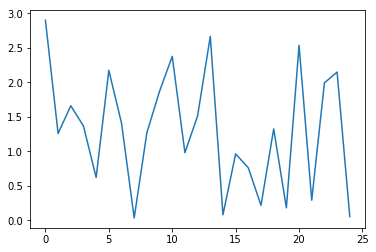

In [108]:
time_list = []
for g in sparse_graphs:
    for i in range(5):
        s = random.randrange(5000)
        t = random.randrange(5000)
        while s == t:
            t = random.randrange(5000)
        t0 = time.time()
        Maxbw = Dijkstra_n2(g,s,t)
        t1 = time.time()
        total = t1-t0
        time_list.append(total)
plt.plot(time_list)
print('The average running time is {} seconds'.format(np.mean(time_list)))

#### To test the performance of algorithm 1, we use the 5 dense graphs, and perform the task of finding MBP for 5 random s and t pairs
-  We show the run time for all 25 combinations (5 graphs x 5 random s,t paris)
-  The average run time of algorithm1 on sparse graph is 8.9 seconds

The average running time is 8.954958648681641 seconds


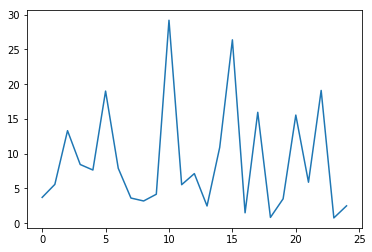

In [154]:
time_list = []
for g in dense_graphs:
    for i in range(5):
        s = random.randrange(5000)
        t = random.randrange(5000)
        while s == t:
            t = random.randrange(5000)
        t0 = time.time()
        Maxbw = Dijkstra_n2(g,s,t)
        t1 = time.time()
        total = t1-t0
        time_list.append(total)
plt.plot(time_list)
print('The average running time is {} seconds'.format(np.mean(time_list)))

## Algorithm 2: 
#### Dijkstra Algorithm without using a heap structure, the time complexity is $O(mlog(n)$)
#### First we define the MaxHeap data structure
- We added a delete(w) function, to delete note with name/index w
- To find w in the heap, the simple search is O(n)
- We improved this O(n) search by recording the location of node w in the list "location"
- The search of w in heap became O(1)

In [157]:
class MaxHeap_locate:
    def __init__(self,items = []):
        super().__init__() # calling parent __init__
        self.heap = [(0,-1)]
        self.locate = [-1]*50000
        for i in items:
            self.heap.append(i)
            self.__floatUp(len(self.heap)-1)
            
    def push(self, data):
        self.heap.append(data)
        self.locate[data[1]]=len(self.heap)-1
        self.__floatUp(len(self.heap) - 1)
        
    def peek(self):
        if self.heap[1]:
            return self.heap[1]
        else:
            return False
            
    def pop(self):
        if len(self.heap)>2:
            self.__swap(1,len(self.heap)-1)
            max = self.heap.pop() # remove the last on the list
            self.__bubbleDown(1)
            
        elif len(self.heap) ==2:
            max = self.heap.pop()
        else:
            max = False
        return max
    
    def delete(self,w):
        i = self.locate[w]
        self.__swap(i,len(self.heap)-1)
        self.heap.pop()
        self.__bubbleDown(i)     
        
    def __swap(self,i,j): # __internal functions
        self.locate[self.heap[i][1]],self.locate[self.heap[j][1]]=self.locate[self.heap[j][1]],self.locate[self.heap[i][1]]
        self.heap[i],self.heap[j] = self.heap[j],self.heap[i]
        
    
    def __floatUp(self,index):
        parent = index//2 # '//' floor division
        if index <= 1:
            return
        elif self.heap[index][0]>self.heap[parent][0]:
            self.__swap(index,parent)
            self.__floatUp(parent)
        
    def __bubbleDown(self, index):
        left = index *2
        right = index*2 +1
        largest = index
        if len(self.heap)>left and self.heap[largest][0]<self.heap[left][0]:
            largest = left
        if len(self.heap)>right and self.heap[largest][0] < self.heap[right][0]:
            largest = right
        if largest !=index:
            self.__swap(index,largest)
            self.__bubbleDown(largest)
        left = index *2
        right = index*2 +1
        largest = index
        if len(self.heap)>left and self.heap[largest][0]<self.heap[left][0]:
            largest = left
        if len(self.heap)>right and self.heap[largest][0] < self.heap[right][0]:
            largest = right
        if largest !=index:
            self.__swap(index,largest)
            self.__bubbleDown(largest)

#### Dijkstra with MaxHeap
-  Instead of searching for the largest edge, we maintain a max heap
-  To delete a node from the max heap, we use the improved O(1) method

In [159]:
def MaxHeap_Dijkstra(g1,s,t):
    status =[0]*g1.Vertices
    bw = [0]*g1.Vertices
    dad = [-1]*g1.Vertices
    for i in range(g1.Vertices):
        status[i]='unseen'
    status[s] = 'intree'
    bw[s] = 9999
    H = MaxHeap_locate()
    for v in g1.LinkedList[s]:
        status[v] = 'fringe'
        bw[v] = g1.Weight[s,v]
        dad[v] = s
        H.push((bw[v],v))
    while H.heap!=[(0,-1)]:
            v = H.peek()[1]
            H.pop()
            status[v] = 'intree'
            if v ==t:
                return bw[v]
            for w in g1.LinkedList[v]:
                if status[w]=='unseen':
                    status[w] = 'fringe'
                    dad[w]=v
                    bw[w]=min(bw[v],g1.Weight[v,w])
                    H.push((bw[w],w))
                elif status[w]=='fringe' and bw[w]<min(bw[v],g1.Weight[v,w]):
                    H.delete(w)
                    dad[w]=v
                    bw[w]=min(bw[v],g1.Weight[v,w])
                    H.push((bw[w],w))

#### To test the performance of algorithm 2, we use the 5 spase graphs, and perform the task of finding MBP for 5 random s and t pairs
-  We show the run time for all 25 combinations (5 graphs x 5 random s,t paris)
-  The average run time of algorithm1 on sparse graph is 0.2 seconds

The average running time is 0.2087201499938965 seconds


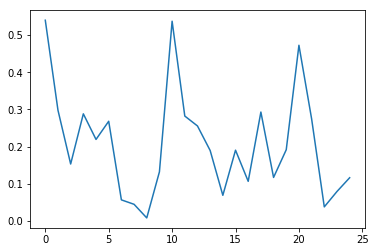

In [160]:
time_list = []
for g in sparse_graphs:
    for i in range(5):
        s = random.randrange(5000)
        t = random.randrange(5000)
        while s == t:
            t = random.randrange(5000)
        t0 = time.time()
        Maxbw = MaxHeap_Dijkstra(g,s,t)
        t1 = time.time()
        total = t1-t0
        time_list.append(total)
plt.plot(time_list)
print('The average running time is {} seconds'.format(np.mean(time_list)))

#### To test the performance of algorithm 2, we use the 5 dense graphs, and perform the task of finding MBP for 5 random s and t pairs
-  We show the run time for all 25 combinations (5 graphs x 5 random s,t paris)
-  The average run time of algorithm1 on sparse graph is 7.4 seconds

The average running time is 7.445741939544678 seconds


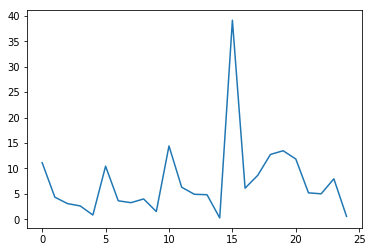

In [162]:
time_list = []
for g in dense_graphs:
    for i in range(5):
        s = random.randrange(5000)
        t = random.randrange(5000)
        #print(s,t)
        while s == t:
            t = random.randrange(5000)
        t0 = time.time()
        Maxbw = MaxHeap_Dijkstra(g,s,t)
        t1 = time.time()
        total = t1-t0
        time_list.append(total)
        #print(i)
plt.plot(time_list)
print('The average running time is {} seconds'.format(np.mean(time_list)))

## Algorithm 3: 
#### Modify the HeapSort structure for Kruskal algorithm, the time complexity is $O(mlog(m)$)

In [163]:
class HeapSort:
    def __init__(self,items = []):
        super().__init__() # calling parent __init__
        self.heap = [(0,-1,-1)]
        for i in items:
            self.heap.append(i)
            self.__floatUp(len(self.heap)-1)
            
    def push(self, data):
        self.heap.append(data)
        self.__floatUp(len(self.heap) - 1)
        
    def peek(self):
        if self.heap[1]:
            return self.heap[1]
        else:
            return False
            
    def pop(self):
        if len(self.heap)>2:
            self.__swap(1,len(self.heap)-1)
            max = self.heap.pop() # remove the last on the list
            self.__bubbleDown(1)
            
        elif len(self.heap) ==2:
            max = self.heap.pop()
        else:
            max = False
        return max
  
    def __swap(self,i,j): # __internal functions
        self.heap[i],self.heap[j] = self.heap[j],self.heap[i]
    
    def __floatUp(self,index):
        parent = index//2 # '//' floor division
        if index <= 1:
            return
        elif self.heap[index][0]>self.heap[parent][0]:
            self.__swap(index,parent)
            self.__floatUp(parent)
        
    def __bubbleDown(self, index):
        left = index *2
        right = index*2 +1
        largest = index
        if len(self.heap)>left and self.heap[largest][0]<self.heap[left][0]:
            largest = left
        if len(self.heap)>right and self.heap[largest][0] < self.heap[right][0]:
            largest = right
        if largest !=index:
            self.__swap(index,largest)
            self.__bubbleDown(largest)

#### Next, we define the Union-Find methods. In the Union method, we try to limit the high of tree by recording the rank of r1 and r2. The root with higher rank became parent of the other root

In [167]:
def Find(v,P):
    cur = v
    while P[cur]!=-1:
        cur = P[cur]
    return cur
def Union(r1,r2,P,rank):
    if rank[r1]>rank[r2]:
        P[r2]=r1
    elif rank[r1]<rank[r2]:
        P[r1]=r2
    else:
        P[r1]=r2
        rank[r2]=rank[r2]+1

#### Since the Kuskal algorithm only generate the max spanning tree, we need to travers the tree from s to t to find the maximum bandwidth path. We define the DFS method to traverse through the tree from s to t

In [164]:
def DFS_main(T,s,g1,t):
    dad = [-1]*g1.Vertices
    visited=[False]*g1.Vertices
    MBP = [0]*g1.Vertices
    MBP[s]=9999
    DFS(T,s,visited,dad,g1,MBP,t)
    #print (MBP)
    return MBP[t]

def DFS(T,v,visited,dad,g1,MBP,t):
    visited[v]=True
    for w in T[v]:
        if visited[w]==False:
            #print(visited)
            dad[w]=v
            MBP[w]=min(MBP[v],g1.Weight[w,v])
            if w ==t:
                return MBP[w]
            else:
                DFS(T,w,visited,dad,g1,MBP,t)

In [165]:
def Kruskal(g1,s,t):
    hs = HeapSort()
    for pair in g1.Weight:
        if pair[0]< pair[1]:
            _w = g1.Weight[pair[0],pair[1]]
            hs.push((_w,pair[0],pair[1]))
    #Make set v
    P = [-1]*g1.Vertices
    rank = [0]*g1.Vertices
    T = collections.defaultdict(set)
    while hs.heap != [(0,-1,-1)]:
        ei = hs.pop()
        ui,vi = ei[1],ei[2]
        r1 = Find(ui,P)
        r2 = Find(vi,P)
        if r1!=r2:
            Union(r1,r2,P,rank)
            T[ui].add(vi)
            T[vi].add(ui)
    mbp= DFS_main(T,1,g1,5)
    return mbp

#### To test the performance of algorithm 3, we use the 5 spase graphs, and perform the task of finding MBP for 5 random s and t pairs
-  We show the run time for all 25 combinations (5 graphs x 5 random s,t paris)
-  The average run time of algorithm1 on sparse graph is 0.5 seconds

The average running time is 0.49441319465637207 seconds


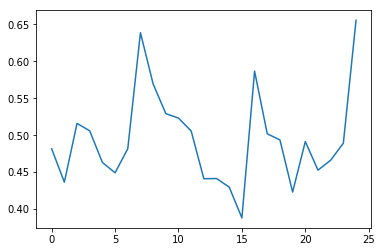

In [168]:
time_list = []
for g in sparse_graphs:
    for i in range(5):
        s = random.randrange(5000)
        t = random.randrange(5000)
        #print(s,t)
        while s == t:
            t = random.randrange(5000)
        t0 = time.time()
        Maxbw = Kruskal(g,s,t)
        t1 = time.time()
        total = t1-t0
        time_list.append(total)
        #print(i)
plt.plot(time_list)
print('The average running time is {} seconds'.format(np.mean(time_list)))

#### To test the performance of algorithm 3, we use the 5 dense graphs, and perform the task of finding MBP for 5 random s and t pairs
-  We show the run time for all 25 combinations (5 graphs x 5 random s,t paris)
-  The average run time of algorithm1 on sparse graph is 109 seconds

2253 870
1341 1667
894 4400
462 993
388 1411
The average running time is 109.75749907493591 seconds


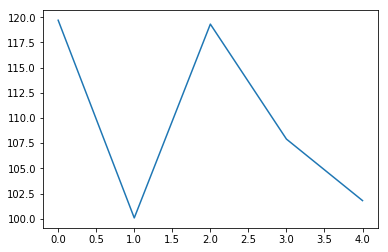

In [169]:
time_list = []
for g in dense_graphs:
    for i in range(1):
        s = random.randrange(5000)
        t = random.randrange(5000)
        print(s,t)
        while s == t:
            t = random.randrange(5000)
        t0 = time.time()
        Maxbw = Kruskal(g,s,t)
        t1 = time.time()
        total = t1-t0
        time_list.append(total)
        #print(i)
plt.plot(time_list)
print('The average running time is {} seconds'.format(np.mean(time_list)))

## Conclusion
#### Comparing the run time in the plot we show above, we can have the following comclusion
- For sparse graph, where m < n, the Dijkstra with Maxheap algorithm gives the best performance. Kruskal algorithm is the second, and Dijkstra without using Maxheap is the slowest. 
- This is because without using MaxHeap, the time completity of Dijkstra is $O(n^{2})$
- For the dense graph, where m>n, the Dijkstra with Maxheap algorithm gives the best performance. Dijkstra without Maxheap is the second, which take similar time to the first one. - This is because, when n=5000, $n^{2}$ = $2.5 * 10^{7}$
- When m is large, where m = 5000*1000/2 = $2.5*10^6$. mlog(n) = $1*10^7$
- Thus First 2 algorithm have similar performance in Dense graph.
- Kruskal algorith in dense graph has the worst performance, this becase its time complexity is O(m log(m)), and in dense graph, m is large
